<a href="https://colab.research.google.com/github/iamMchoi/OpenCV/blob/master/OpenCV_DetectFace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
file=files.upload()
#Upload widget is only available when the cell has been executed in the current browser session. Please rerun this cell to enable. Saving photo1.jpg to photo1.jpg

Saving do.jpg.jfif to do.jpg.jfif


In [0]:
#Read image file
for fn in file.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(file[fn])))
  
  #Read image file // fn is file's keys of dictionary. It is read in the for root
  #img = cv2.imread(fn,cv2.IMREAD_GRAYSCALE)  #When read, it makes gray image
  img = cv2.imread(fn)

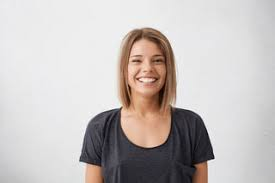

In [0]:
#When doesn't work cv2.imshow, it is  solution
from google.colab.patches import cv2_imshow

#img = cv2.imread('KakaoTalk.jpg',0)
#img = cv2.imread('Seojin Choi _Mrs Grenier.jpg',0)
cv2_imshow(img) #use this instead of cv2.imshow


In [0]:
#img = cv2.imread('do.jpg.jfif')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml') <-- error
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

print(faces)
print(gray.shape)

[[120  41  52  52]]
(183, 275)


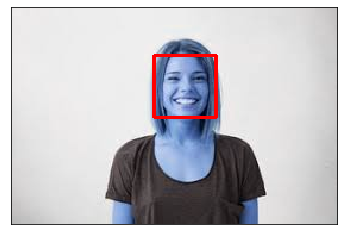

In [0]:
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)

    roi_gray  = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]

    eyes = eye_cascade.detectMultiScale(roi_gray, scaleFactor=1.3, minNeighbors=5)
    
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

plt.grid(None)   
plt.xticks([])
plt.yticks([])
imgplot = plt.imshow(img)